# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.062670e+01     7.092281e+00
 * time: 0.05775785446166992
     1     2.752662e+01     5.372727e+00
 * time: 0.06649899482727051
     2     2.030204e+01     4.928548e+00
 * time: 0.08773493766784668
     3     1.244902e+01     1.540952e+00
 * time: 0.1121368408203125
     4     1.182048e+01     2.517903e+00
 * time: 0.1281418800354004
     5     1.085237e+01     1.542821e+00
 * time: 0.14781904220581055
     6     1.034467e+01     1.767816e+00
 * time: 0.1637709140777588
     7     9.571355e+00     1.342729e+00
 * time: 0.1797330379486084
     8     9.127608e+00     8.308312e-01
 * time: 0.19576382637023926
     9     8.803651e+00     9.586929e-01
 * time: 0.2116239070892334
    10     8.606111e+00     8.369178e-01
 * time: 0.22723102569580078
    11     8.518859e+00     6.788002e-01
 * time: 0.24244189262390137
    12     8.485500e+00     6.886133e-01
 * time: 0.25397586822509766
    13     8.412440e+00     4.434016e-01
 * time: 0.26

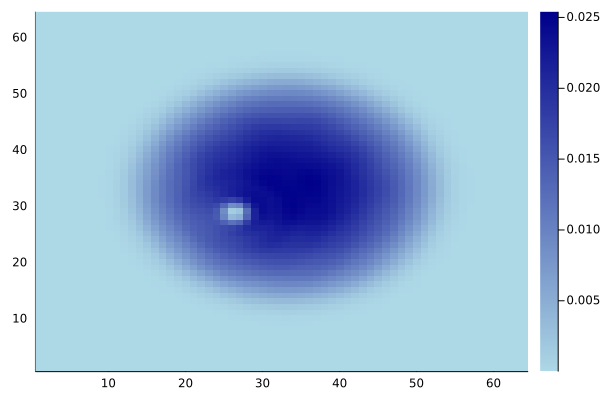

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)